In [1]:
import pandas as pd
import pytextrank
import spacy
from spacy.tokens import Span
from germalemma import GermaLemma
from keybert import KeyBERT
import pandas as pd

In [2]:
import pickle
with open('dataset_new.pkl', 'rb') as f:
    data_new = pickle.load(f)

In [3]:
data_new

,Documents,file_name,Text,Ground_Truth,question_answer_pair,questions,answers
0,document1,Nacaps-W1_questionnaire,"Die Hochschule, an der Sie im Dezember 2018 zu...","'wissenschaftssystem', 'betreuung', 'wissensch...","['Die Hochschule, an der Sie im Dezember 2018 ...","['Die Hochschule, an der Sie im Dezember 2018 ...","[[Ja, ich bin mit der Weitergabe meiner Angabe..."
1,document2,WeGe_W2,Wie ist dieser studienvorbereitende Kurs verla...,"'integration', 'geflüchtete', 'studienkolleg',...",['Wie ist dieser studienvorbereitende Kurs ver...,['Wie ist dieser studienvorbereitende Kurs ver...,[[Dieser Kurs ist noch nicht beendet und ich b...
2,document3,StuMa2020,Welchen Studienabschluss haben Sie in Ihrem le...,"'beruflicher verbleib von exmatrikulierten', '...",['Welchen Studienabschluss haben Sie in Ihrem ...,['Welchen Studienabschluss haben Sie in Ihrem ...,"[[Master., Bachelor., Staatsexamen., einen and..."
3,document4,Studierdenensurvey2016,An welcher Art Hochschule studieren Sie. Unive...,"'evaluation', 'qualifikation', 'effizienz', 's...",['An welcher Art Hochschule studieren Sie. Uni...,"['An welcher Art Hochschule studieren Sie.', '...","[[Universität/Technische Universität., Fachhoc..."
4,document5,Absolventen_2009.2_Haupt,Wie würden Sie Ihre derzeitige Tätigkeit bzw. ...,'hochschulforschung',['Wie würden Sie Ihre derzeitige Tätigkeit bzw...,['Wie würden Sie Ihre derzeitige Tätigkeit bzw...,"[[Als kurzfristige Übergangssituation., Als Si..."
5,document6,Promopanel_W4,Waren oder sind Sie seit der letzten Befragung...,"'promotion', 'hochschulforschung', 'promotion'...",['Waren oder sind Sie seit der letzten Befragu...,['Waren oder sind Sie seit der letzten Befragu...,"[[''], [], [], [], [], [], [], [], ['Bitte aus..."
6,document7,Studienberechtigte_2008.3,Wie zufrieden sind Sie mit Ihrem bisherigen Bi...,"'studienberechtigte', 'hochschulforschung'",['Wie zufrieden sind Sie mit Ihrem bisherigen ...,['Wie zufrieden sind Sie mit Ihrem bisherigen ...,"[[sehr zufrieden., sehr unzufrieden.], [proble..."
7,document8,Wissenschaftlerbefragung2016,In welcher Sprache möchten Sie die Befragung d...,'hochschulforschung',['In welcher Sprache möchten Sie die Befragung...,['In welcher Sprache möchten Sie die Befragung...,"[['Deutsch.', 'English.'], ['Professor/Profess..."
8,document9,Promopanel_W3,Waren oder sind Sie seit der letzten Befragung...,"'promotion', 'hochschulforschung', 'promotion'...",['Waren oder sind Sie seit der letzten Befragu...,['Waren oder sind Sie seit der letzten Befragu...,"[[''], [], [], [], [], [], [], [], ['Bitte aus..."
9,document10,Sozialerhebung20,Welchen Abschluss streben Sie in Ihrem derzeit...,'hochschulforschung',['Welchen Abschluss streben Sie in Ihrem derze...,['Welchen Abschluss streben Sie in Ihrem derze...,"[[Bachelor (nicht Lehramt., Bachelor mit dem Z..."


In [12]:
len(ground_truth[5])

16

In [13]:
ground_truth[5]

["'promotion'",
 "'hochschulforschung'",
 "'promotion'",
 "'promotionsbedingungen'",
 "'promotionsbetreuung'",
 "'promotionsfinanzierung'",
 "'bildungsverlauf'",
 "'berufsverlauf'",
 "'beschäftigungsbedingungen'",
 "'wissenschaftliche aktivitäten'",
 "'weiterqualifikation'",
 "'karriereziele'",
 "'auslandsaufenthalt'",
 "'soziodemographie'",
 "'gesundheit'",
 "'persönlichkeit'"]

In [6]:
gt = list(data_new['Ground_Truth'])

In [7]:
ground_truth =[]
for i in range(len(gt)):
    ground_truth.append([gt[i]])

In [8]:
for i in range(len(ground_truth)):
    ground_truth[i]= ground_truth[i][0].split(",")

In [9]:
for i in range(len(ground_truth)):
    for j in range(len(ground_truth[i])):
        ground_truth[i][j] = ground_truth[i][j].strip()

In [11]:
#Then quit and come back later… and open with pickle.load...
import pickle
with open('Data_KeyBert_new.pkl', 'rb') as f:
    data = pickle.load(f)

In [12]:
data

,Documents,file_name,Text,Ground_Truth,Text_Sentences
0,document1,Nacaps-W1_questionnaire,"""Die Hochschule, an der Sie im Dezember 2018 z...","'wissenschaftssystem', 'betreuung', 'wissensch...","[Die Hochschule, an der Sie im Dezember 2018 z..."
1,document2,WeGe_W2,"""Wie ist dieser studienvorbereitende Kurs verl...","'integration', 'geflüchtete', 'studienkolleg',...",[Wie ist dieser studienvorbereitende Kurs verl...
2,document3,StuMa2020,"""Welchen Studienabschluss haben Sie in Ihrem l...","'beruflicher verbleib von exmatrikulierten', '...",[Welchen Studienabschluss haben Sie in Ihrem l...
3,document4,Studierdenensurvey2016,"""An welcher Art Hochschule studieren Sie. Univ...","'evaluation', 'qualifikation', 'effizienz', 's...","[An welcher Art Hochschule studieren Sie., Wel..."
4,document5,Absolventen_2009.2_Haupt,"""Wie würden Sie Ihre derzeitige Tätigkeit bzw....",'hochschulforschung',[Wie würden Sie Ihre derzeitige Tätigkeit bzw....
5,document6,Promopanel_W4,"""Waren oder sind Sie seit der letzten Befragun...","'promotion', 'hochschulforschung', 'promotion'...",[Waren oder sind Sie seit der letzten Befragun...
6,document7,Studienberechtigte_2008.3,"""Wie zufrieden sind Sie mit Ihrem bisherigen B...","'studienberechtigte', 'hochschulforschung'",[Wie zufrieden sind Sie mit Ihrem bisherigen B...
7,document8,Wissenschaftlerbefragung2016,"""In welcher Sprache möchten Sie die Befragung ...",'hochschulforschung',[In welcher Sprache möchten Sie die Befragung ...
8,document9,Promopanel_W3,"""Waren oder sind Sie seit der letzten Befragun...","'promotion', 'hochschulforschung', 'promotion'...",[Waren oder sind Sie seit der letzten Befragun...
9,document10,Sozialerhebung20,"""Welchen Abschluss streben Sie in Ihrem derzei...",'hochschulforschung',[Welchen Abschluss streben Sie in Ihrem derzei...


In [13]:
data['Text_Sentences'][0]

['Die Hochschule, an der Sie im Dezember 2018 zur Promotion registriert waren, hat ebenfalls Interesse daran, mehr über die Promotionsbedingungen ihrer Promovierenden zu erfahren.',
 'Anfang Dezember 2018 waren Sie an Ihrer Hochschule offiziell als Doktorand(in) registriert.',
 'Handelt es sich um eine offiziell der Hochschule gemeldete Unterbrechung.',
 'Können Sie sich noch erinnern, in welchem Quartal Sie mit den Arbeiten begonnen haben. ',
 'Können Sie sich noch erinnern, in welchem Quartal Sie zugelassen wurden.',
 'Ist Ihre Hochschule darüber informiert, dass Sie Ihre Promotion abgebrochen haben.',
 'Können Sie sich noch erinnern, in welchem Quartal Sie Ihre Promotion abgebrochen haben.',
 'Ist an Ihrem Promotionsverfahren eine Hochschule im Ausland beteiligt.',
 'Handelt es sich dabei um einen gemeinsamen Abschluss der Hochschulen aus dem In- und Ausland (cotutelle de thèse).',
 'Ist an ihrem Promotionsverfahren eine Fachhochschule bzw.',
 'Waren Sie in den letzten Jahren an der

In [14]:
data['file_name']

0           Nacaps-W1_questionnaire
1                           WeGe_W2
2                         StuMa2020
3            Studierdenensurvey2016
4          Absolventen_2009.2_Haupt
5                     Promopanel_W4
6         Studienberechtigte_2008.3
7      Wissenschaftlerbefragung2016
8                     Promopanel_W3
9                  Sozialerhebung20
10                          WeGe_W3
11                    Promopanel_W5
12                       sid_corona
13                    Promopanel_W2
14               Absolventen_2013-2
15     Absolventen_2009.2_Promotion
16                 Sozialerhebung21
17    Absolventen_2009.2_Mobilität
18                 Sozialerhebung19
Name: file_name, dtype: object

In [15]:
len(data['Text'][8])

12156

In [16]:
data['Text_Sentences'][7]

['In welcher Sprache möchten Sie die Befragung durchführen?  Please select your preferred language for the survey.',
 'Bitte nennen Sie uns Ihre derzeitige Beschäftigungsposition.',
 'Um welche Art von Professur handelt es sich dabei.',
 'Welcher Besoldungsstufe ist Ihre Professur zugeordnet.',
 'Sind Sie promoviert.',
 'Hatten Sie innerhalb der letzten fünf Jahre das Amt des Dekans/der Dekanin inne.',
 'Sind Sie habilitiert.',
 'An welcher Art von Einrichtung sind Sie derzeit primär wissenschaftlich tätig.',
 'Welchem Fachgebiet würden Sie sich selbst zuordnen.',
 'Wie ist Ihre Stelle finanziert.',
 'Ist Ihr gegenwärtiger Arbeitsvertrag….',
 'Gab es zwischen den Arbeitsverträgen Zeiten, in denen Sie ungewollt ohne Beschäftigungsverhältnis und ohne andere strukturierte Förderung (z.',
 'Welche Mindestvertragslaufzeit für Doktorandinnen/Doktoranden sollte Ihrer Ansicht nach nicht unterschritten werden.',
 'Welche Mindestvertragslaufzeit für Postdocs sollte Ihrer Ansicht nach nicht unter

In [17]:
# test = data['Text_Sentences'][0]

In [18]:
# len("".join (i for i in test))

In [19]:
len(data['Text_Sentences'][7])

527

In [20]:
# # # first build a list, then use pickle.dump to send it to a file...
# import pickle
# with open('old_test.pkl','wb') as f:
#     pickle.dump(test_new, f)

In [21]:
GT_within_text = [['wissenschaftssystem', 'betreuung', 'wissenschaftliche karriere', 'vereinbarkeit von familie und beruf', 'promovierende', 'promotion', 'finanzierung', 'mobilität', 'gesundheit'],
 ['geflüchtete', 'studienkolleg', 'studienvorbereitung'],
 ['masterstudium'],
 ['evaluation', 'qualifikation', 'studiensituation'],
 [''],
 ['promotion', 'arbeitsbedingungen','wissenschaftliche aktivitäten','weiterbildung', 'auslandsaufenthalt'],
 [''],
 [''],
 ['promotion', 'arbeitsbedingungen','wissenschaftliche aktivitäten', 'weiterbildung', 'auslandsaufenthalt'],
 [''],
 ['geflüchtete', 'studienkolleg', 'studienvorbereitung'],
 ['promotion', 'arbeitsbedingungen', 'weiterbildung','wissenschaftliche aktivitäten', 'auslandsaufenthalt', 'gesundheit'],
 ['digitale lehre', 'wohnsituation', 'finanzielle situation', 'studiensituation', 'corona'],
 ['promotion', 'arbeitsbedingungen', 'weiterbildung', 'auslandsaufenthalt'],
 [''],
 [''],
 [''],
 [''],
 ['']]

In [22]:
GT_within_text

[['wissenschaftssystem',
  'betreuung',
  'wissenschaftliche karriere',
  'vereinbarkeit von familie und beruf',
  'promovierende',
  'promotion',
  'finanzierung',
  'mobilität',
  'gesundheit'],
 ['geflüchtete', 'studienkolleg', 'studienvorbereitung'],
 ['masterstudium'],
 ['evaluation', 'qualifikation', 'studiensituation'],
 [''],
 ['promotion',
  'arbeitsbedingungen',
  'wissenschaftliche aktivitäten',
  'weiterbildung',
  'auslandsaufenthalt'],
 [''],
 [''],
 ['promotion',
  'arbeitsbedingungen',
  'wissenschaftliche aktivitäten',
  'weiterbildung',
  'auslandsaufenthalt'],
 [''],
 ['geflüchtete', 'studienkolleg', 'studienvorbereitung'],
 ['promotion',
  'arbeitsbedingungen',
  'weiterbildung',
  'wissenschaftliche aktivitäten',
  'auslandsaufenthalt',
  'gesundheit'],
 ['digitale lehre',
  'wohnsituation',
  'finanzielle situation',
  'studiensituation',
  'corona'],
 ['promotion', 'arbeitsbedingungen', 'weiterbildung', 'auslandsaufenthalt'],
 [''],
 [''],
 [''],
 [''],
 ['']]

In [23]:
keywords_within_text = []
for i in range(len(GT_within_text)):
    keywords_within_text.append([])
    for j in range(len(GT_within_text[i])):
        if len(GT_within_text[i][j].split(" ")) == 1:
            keywords_within_text[i].append(GT_within_text[i][j])

In [24]:
keywords_within_text[13]

['promotion', 'arbeitsbedingungen', 'weiterbildung', 'auslandsaufenthalt']

In [25]:
keywords_within_text[11]

['promotion',
 'arbeitsbedingungen',
 'weiterbildung',
 'auslandsaufenthalt',
 'gesundheit']

In [26]:
keywords_within_text[8]

['promotion', 'arbeitsbedingungen', 'weiterbildung', 'auslandsaufenthalt']

In [27]:
keywords_within_text[14]

['']

In [28]:
data

,Documents,file_name,Text,Ground_Truth,Text_Sentences
0,document1,Nacaps-W1_questionnaire,"""Die Hochschule, an der Sie im Dezember 2018 z...","'wissenschaftssystem', 'betreuung', 'wissensch...","[Die Hochschule, an der Sie im Dezember 2018 z..."
1,document2,WeGe_W2,"""Wie ist dieser studienvorbereitende Kurs verl...","'integration', 'geflüchtete', 'studienkolleg',...",[Wie ist dieser studienvorbereitende Kurs verl...
2,document3,StuMa2020,"""Welchen Studienabschluss haben Sie in Ihrem l...","'beruflicher verbleib von exmatrikulierten', '...",[Welchen Studienabschluss haben Sie in Ihrem l...
3,document4,Studierdenensurvey2016,"""An welcher Art Hochschule studieren Sie. Univ...","'evaluation', 'qualifikation', 'effizienz', 's...","[An welcher Art Hochschule studieren Sie., Wel..."
4,document5,Absolventen_2009.2_Haupt,"""Wie würden Sie Ihre derzeitige Tätigkeit bzw....",'hochschulforschung',[Wie würden Sie Ihre derzeitige Tätigkeit bzw....
5,document6,Promopanel_W4,"""Waren oder sind Sie seit der letzten Befragun...","'promotion', 'hochschulforschung', 'promotion'...",[Waren oder sind Sie seit der letzten Befragun...
6,document7,Studienberechtigte_2008.3,"""Wie zufrieden sind Sie mit Ihrem bisherigen B...","'studienberechtigte', 'hochschulforschung'",[Wie zufrieden sind Sie mit Ihrem bisherigen B...
7,document8,Wissenschaftlerbefragung2016,"""In welcher Sprache möchten Sie die Befragung ...",'hochschulforschung',[In welcher Sprache möchten Sie die Befragung ...
8,document9,Promopanel_W3,"""Waren oder sind Sie seit der letzten Befragun...","'promotion', 'hochschulforschung', 'promotion'...",[Waren oder sind Sie seit der letzten Befragun...
9,document10,Sozialerhebung20,"""Welchen Abschluss streben Sie in Ihrem derzei...",'hochschulforschung',[Welchen Abschluss streben Sie in Ihrem derzei...


In [29]:
keyphrases_within_text = []
for i in range(len(GT_within_text)):
    keyphrases_within_text.append([])
    for j in range(len(GT_within_text[i])):
        if len(GT_within_text[i][j].split(" ")) > 1:
            keyphrases_within_text[i].append(GT_within_text[i][j])

In [30]:
keyphrases_within_text

[['wissenschaftliche karriere', 'vereinbarkeit von familie und beruf'],
 [],
 [],
 [],
 [],
 ['wissenschaftliche aktivitäten'],
 [],
 [],
 ['wissenschaftliche aktivitäten'],
 [],
 [],
 ['wissenschaftliche aktivitäten'],
 ['digitale lehre', 'finanzielle situation'],
 [],
 [],
 [],
 [],
 [],
 []]

In [31]:
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import pickle
import sklearn
import numpy as np
import nltk 

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/pawan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/pawan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
from nltk.corpus import stopwords
stop_words = stopwords.words('german')
stop_words
print(len(stop_words))
stop_words.extend(["a","ab","können","bzw", "usw","eu","wiwi","soz", "nah","dsh","and","eng","wahr", "kfz", "kiel", "öl", "fil" "sose", "ha","wi", "übt","wis","vwl","geben", "hhu","bitte","inkl", "läuft", "ggf", "ern", "te", "edv", "un","ver", "finno", "etc","ehe","kfw", "maße", "möchten", "cau","ca", "juni", "uds", "innen", "aber","ach","acht","achte","achten","achter","achtes","ag","alle","fh","allein","allem","allen","aller","allerdings","alles","allgemeinen","als","also","am","an","andere","anderen","andern","anders","au","auch","auf","aus","ausser","außer","ausserdem","außerdem","b","bald","bei","beide","beiden","beim","beispiel","bekannt","bereits","besonders","besser","üben","besten","bin","sein","können","bis","bisher","bist","c","d","da","dabei","dadurch","dafür","dagegen","daher","dahin","dahinter","damals","damit","danach","daneben","dank","dann","daran","darauf","daraus","darf","darfst","darin","darüber","darum","darunter","das","dasein","daselbst","dass","daß","dasselbe","davon","davor","dazu","dazwischen","dein","deine","deinem","deiner","dem","dementsprechend","demgegenüber","demgemäss","demgemäß","demselben","demzufolge","den","denen","denn","denselben","saarlandes","der","deren","derjenige","derjenigen","dermassen","dermaßen","derselbe","derselben","des","deshalb","desselben","dessen","deswegen","d.h","dich","die","diejenige","diejenigen","dies","diese","dieselbe","dieselben","diesem","diesen","dieser","dieses","dir","doch","dort","drei","drin","dritte","dritten","dritter","drittes","du","durch","durchaus","dürfen","dürft","durfte","durften","e","eben","ebenso","ehrlich","ei","ei,","eigen","eigene","eigenen","eigener","eigenes","ein","einander","eine","einem","einen","einer","eines","einige","einigen","einiger","einiges","einmal","eins","elf","en","ende","endlich","entweder","er","Ernst","erst","erste","ersten","erster","erstes","es","etwa","etwas","euch","f","früher","fünf","fünfte","fünften","fünfter","fünftes","für","g","gab","ganz","ganze","ganzen","ganzer","ganzes","gar","gedurft","gegen","gegenüber","gehabt","gehen","geht","gekannt","gekonnt","gemacht","gemocht","gemusst","genug","gerade","gern","gesagt","geschweige","gewesen","gewollt","geworden","gibt","ging","gleich","gott","gross","groß","grosse","große","grossen","großen","grosser","großer","grosses","großes","gut","gute","guter","gutes","h","habe","haben","habt","hast","hat","hatte","hätte","hatten","hätten","heisst","her","heute","hier","hin","hinter","hoch","i","ich","ihm","ihn","ihnen","ihr","ihre","ihrem","ihren","ihrer","ihres","im","immer","in","indem","infolgedessen","ins","irgend","ist","j","ja","jahr","jahre","jahren","je","jede","jedem","jeden","jeder","jedermann","jedermanns","jedoch","jemand","jemandem","jemanden","jene","jenem","jenen","jener","jenes","jetzt","k","kam","kann","kannst","kaum","kein","keine","keinem","keinen","keiner","kleine","kleinen","kleiner","kleines","kommen","kommt","können","könnt","konnte","könnte","konnten","kurz","l",
                   "lang","lange","leicht","leide","lieber","los","m","inn","usw ","dfg","machen", "erc","macht","machte","mag","magst","mahn","man","manche","manchem","manchen","mancher","manches","mann","mehr","mein","meine","meinem","meinen","meiner","meines","mensch","menschen","mich","mir","mit","mittel","mochte","möchte","mochten","düsseldorf","mögen","möglich","mögt","morgen","muss","muß","müssen","musst","müsst","musste","mussten","n","na","nach","pogs","vater","mutter","nachdem","nahm","natürlich","neben","nein","neue","neuen","neun","neunte","neunten","neunter","neuntes","nicht","nichts","nie","niemand","niemandem","niemanden","noch","nun","nur","o","ob","oben","oder","offen","oft","ohne","Ordnung","p","q","r","recht","rechte","rechten","rechter","rechtes","richtig","rund","s","sa","sache","sagt","sagte","sah","satt","schlecht","Schluss","schon","sechs","sechste","sechsten","sechster","sechstes","sehr","sei","seid","seien","sein","seine","seinem","seinen","seiner","seines","seit","seitdem","selbst","sich","sie","sieben","siebente","siebenten","siebenter","siebentes","sind","so","solang","solche","solchem","solchen","solcher","solches","soll","sollen","sollte","sollten","sondern","sonst","sowie","später","statt","t","tag","tage","tagen","tat","teil","tel","tritt","trotzdem","tun","u","über","überhaupt","übrigens","uhr","um","und","und?","uns","unser","unsere","unserer","unter","v","vergangenen","viel","viele","vielem","vielen","vielleicht","vier","vierte","vierten","vierter","viertes","vom","vor","w","wahr?","während","währenddem","währenddessen","wann","war","wäre","waren","wart","warum","was","wegen","weil","weit","weiter","weitere","weiteren","weiteres","welche","welchem","welchen","welcher","welches","wem","wen","wenig","wenige","weniger","weniges","wenigstens","wenn","wer","werde","werden","werdet","wessen","wie","wieder","will","willst","wir","wird","wirklich","wirst","wo","wohl","wollen","wollt","wollte","wollten","worden","wurde","würde","wurden","würden","x","y","z","z.b","zehn","zehnte","zehnten","zehnter","zehntes","zeit","zu","zuerst","zugleich","zum","zunächst","zur","zurück","zusammen","zwanzig","zwar","zwei","zweite","zweiten","zweiter","zweites","zwischen","zwölf","euer","eure","hattest","hattet","jedes","mußt","müßt","sollst","sollt","soweit","weshalb","wieso","woher","wohin"])
print(len(stop_words))

232
878


In [33]:
def clean_text(text, for_embedding=False):
    """
        - remove any html tags (< /br> often found)
        - Keep only ASCII + European Chars and whitespace, no digits
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace
        if not for embedding (but e.g. tdf-idf):
        - all lowercase
        - remove stopwords, punctuation and stemm
    """
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_TAGS = re.compile(r"<[^>]+>")
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
    if for_embedding:
         #Keep punctuation
        RE_ASCII = re.compile(r"[^A-Za-zÀ-ž.! ]", re.IGNORECASE)
        RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž.!?]\b", re.IGNORECASE)

    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)

    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    if for_embedding:
        # no stemming, lowering and punctuation / stop words removal
        words_filtered = word_tokens
    else:
        words_filtered = [
            word for word in words_tokens_lower if word not in stop_words
        ] 

    text_clean = " ".join(words_filtered)
    return text_clean

In [34]:
data["clean_text"] = data["Text"].map(
    lambda x: clean_text(x, for_embedding=True) if isinstance(x, str) else x
)

In [35]:
data["clean_text"][11]

'Waren oder sind Sie seit der letzten Befragung im in irgendeiner Form erwerbstätig . Bitte geben Sie mit Hilfe der Zeilennummern an bei welcher Stelle es sich um Ihre aktuelle Stelle handelt . Handelt es sich bei Ihrer letzten beruflichen Station um dieselbe Stelle die Sie zum Zeitpunkt der letzten Befragung im ausgeübt haben . Handelte es sich bei Ihrer letzten Stelle um eine Tätigkeit in der Wissenschaft . Welcher der folgenden Personalkategorien konnten Sie sich zuordnen . Waren Sie zuletzt im öffentlichen Dienst bzw . einem dem öffentlichen Dienst tariflich angeglichenen Arbeitsverhältnis beschäftigt . Wie viele Mitarbeiter innen waren bei Ihrem Arbeitgeber beschäftigt . Welchem Wirtschaftsbereich gehörte der Betrieb bzw . die Einrichtung in dem der Sie arbeiteten schwerpunktmäßig an . Haben Sie zuletzt in einer Position gearbeitet in der ... Haben Sie zuletzt in einer Position gearbeitet in der ... Wie viel Euro pro Jahr erhielten Sie darüber hinaus jährlich in Form von Zulagen .

In [36]:
clean_text_df=[]
for i in range(len(data["Text_Sentences"])):
    clean_text_df.append([])
    for elem in data["Text_Sentences"][i]:
        clean_text_df[i].append(clean_text(elem, for_embedding=True))

In [37]:
new_clean_text = []
for i in range(len(clean_text_df)):
    new_clean_text.append((list(filter(lambda x: x, clean_text_df[i]))))

In [38]:
data["Clean_Text_Sentences"] = new_clean_text

In [39]:
data["Clean_Text_Sentences"][10]

['Welches Ergebnis haben Sie bei der Sprachprüfung für den Hochschulzugang DSH TestDaF oder andere Prüfung erhalten . Ich habe . Ich habe das Niveau . Ich habe die Prüfung bestanden aber weiß das Ergebnis nicht mehr . Ich habe die Prüfung nicht bestanden aber weiß das Ergebnis nicht mehr . Ich habe noch kein Prüfungsergebnis erhalten .',
 'Welches Ergebnis haben Sie bei der Feststellungsprüfung für den Hochschulzugang erhalten . Ich habe die Gesamtnote . Ich habe die Prüfung bestanden aber weiß das Ergebnis nicht mehr . Ich habe die Prüfung nicht bestanden aber weiß das Ergebnis nicht mehr . Ich habe noch kein Prüfungsergebnis erhalten .',
 'Was machen Sie zurzeit genau . Ich studiere in einem Studiengang an einer Hochschule oder Universität . Ich besuche einen weiteren Kurs zur Vorbereitung auf eine Sprachprüfung für den Hochschulzugang . DSH TestDaF . Ich besuche einen weiteren Schwerpunktkurs zur Vorbereitung auf eine Feststellungsprüfung an einem Studienkolleg . Ich warte auf meine

In [40]:
Preprocesed_text = []
for i in range(len(data["Clean_Text_Sentences"])):
    Preprocesed_text.append([])
    for j in range(len(data["Clean_Text_Sentences"][i])):
        Preprocesed_text[i].append(re.sub(r'\s([?.!"](?:\s|$))', r'\1', data["Clean_Text_Sentences"][i][j])) 

In [41]:
Preprocesed_text[10]

['Welches Ergebnis haben Sie bei der Sprachprüfung für den Hochschulzugang DSH TestDaF oder andere Prüfung erhalten. Ich habe. Ich habe das Niveau. Ich habe die Prüfung bestanden aber weiß das Ergebnis nicht mehr. Ich habe die Prüfung nicht bestanden aber weiß das Ergebnis nicht mehr. Ich habe noch kein Prüfungsergebnis erhalten.',
 'Welches Ergebnis haben Sie bei der Feststellungsprüfung für den Hochschulzugang erhalten. Ich habe die Gesamtnote. Ich habe die Prüfung bestanden aber weiß das Ergebnis nicht mehr. Ich habe die Prüfung nicht bestanden aber weiß das Ergebnis nicht mehr. Ich habe noch kein Prüfungsergebnis erhalten.',
 'Was machen Sie zurzeit genau. Ich studiere in einem Studiengang an einer Hochschule oder Universität. Ich besuche einen weiteren Kurs zur Vorbereitung auf eine Sprachprüfung für den Hochschulzugang. DSH TestDaF. Ich besuche einen weiteren Schwerpunktkurs zur Vorbereitung auf eine Feststellungsprüfung an einem Studienkolleg. Ich warte auf meinen Prüfungstermin

In [42]:
cleaned_text = []
for i in range(len(Preprocesed_text)):
    cleaned_text.append([])
    for j in range(len(Preprocesed_text[i])):
        for line in Preprocesed_text[i][j].split('\n'):
            # Replace multiple dots with space
            line = re.sub('\. \.+', '.', line) 
            # Remove single dots
            cleaned_text[i].append(re.sub('\.', '.', line))

In [43]:
cleaned_text[13]

['Haben Sie einen Ausbildungsberuf erlernt. Industriekauffrau bzw. mann Steuerfachangestellte.',
 'Wo haben Sie Ihre Studienberechtigung erworben.',
 'Haben Sie eine der folgenden praktischen Ausbildungsphasen erfolgreich absolviert bzw. befinden Sie sich aktuell in einer. Referendariat Lehramt. Referendariat Rechtswissenschaft. Sonstiges Referendariat für eine Beamtenlaufbahn. Vikariat. Anerkennungspraktikum jahr als Sozialarbeiter in bzw. Soziapädagogin Sozialpädagoge. Ärztin Arzt im Praktikum AiP bis Oktober. Ärztin Arzt im praktischen Jahr. Nein.',
 'Haben Sie für Ihre Promotion einen Preis erhalten. Ja. Nein.',
 'Waren Sie nach dem Abschluss Ihrer Promotion im in irgendeiner Form erwerbstätig. Ja und ich bin es aktuell. Ja aber nicht aktuell. wegen Elternzeit in Vollzeit längerfristiger Krankheit Arbeitslosigkeit. Nein.',
 'Haben Sie die weitere Promotion bereits begonnen. Ja und bereits abgeschlossen. Ja aber noch nicht beendet. Ja aber zurzeit unterbrochen. Ja aber wieder abgebr

In [44]:
#using spacy model for POS tagging
nlp = spacy.load('de_core_news_lg')
Extracted_Pos_tags=[]  # can change it to Extracted_Noun
for i in range(len(cleaned_text)):
    Extracted_Pos_tags.append([])
    for j in range(len(cleaned_text[i])):
        Extracted_Pos_tags[i].append([])
        doc = nlp(cleaned_text[i][j])
        for t in doc:
            tag=t.pos_
            if t.text not in Extracted_Pos_tags[i][j]:
                Extracted_Pos_tags[i][j].append((t.text, t.pos_))  #for appending to it as a tuples: constructing a tuple   

In [45]:
lemmatizer = GermaLemma()
lemmatized_words = []
nlp = spacy.load('de_core_news_lg')

for i in range(len(Extracted_Pos_tags)):
    lemmatized_words.append([])
    for j in range(len(Extracted_Pos_tags[i])):
        lemmatized_words[i].append([])
        lemma_spacy = nlp(cleaned_text[i][j])
        for l in range(len(lemma_spacy)):
            token = lemma_spacy[l]
            if token.pos_ not in ['NOUN','ADJ','VERB','ADV']:
                lemmatized_words[i][j].append(token.lemma_)
            else:
                lemmatized_words[i][j].append(lemmatizer.find_lemma(Extracted_Pos_tags[i][j][l][0], Extracted_Pos_tags[i][j][l][1]))

In [46]:
lemmatized_words[0][0]

['der',
 'Hochschule',
 'an',
 'der',
 'ich',
 'im',
 'Dezember',
 'zur',
 'Promotion',
 'registrieren',
 'sein',
 'haben',
 'ebenfalls',
 'Interesse',
 'daran',
 'mehr',
 'über',
 'der',
 'Promotionsbedingung',
 'sich',
 'Promovierenden',
 'zu',
 'erfahren',
 '.']

In [47]:
lemma_sentences = []
for i in range(len(lemmatized_words)):
    lemma_sentences.append([])
    for j in range(len(lemmatized_words[i])):
        lemma_sentences[i].append(' '.join(lemmatized_words[i][j]))

In [48]:
lemma_sentences[5]

['Ware oder sein ich seit der letzter Befragung im in irgendeiner Form erwerbstätig .',
 'Bitte vergeben ich für jed Arbeitgeber ein anderer Buchstabe und für derselbe Arbeitgeber immer derselbe Buchstabe . Bitte auswählen . Arbeitgeber . Arbeitgeber . Arbeitgeber . Arbeitgeber . Arbeitgeber . Arbeitgeber . Arbeitgeber . Arbeitgeber . Selbständigkeit .',
 'Haben ich seit einen weit Tätigkeit ausüben .',
 'Bitte vergeben ich für jed Arbeitgeber ein anderer Buchstabe und für derselbe Arbeitgeber immer derselbe Buchstabe . Bitte auswählen . Arbeitgeber . Arbeitgeber . Arbeitgeber . Arbeitgeber . Arbeitgeber . Arbeitgeber . Arbeitgeber . Arbeitgeber . Selbständigkeit .',
 'Haben ich seit einen weit Tätigkeit ausüben .',
 'Bitte vergeben ich für jed Arbeitgeber ein anderer Buchstabe und für derselbe Arbeitgeber immer derselbe Buchstabe . Bitte auswählen . Arbeitgeber . Arbeitgeber . Arbeitgeber . Arbeitgeber . Arbeitgeber . Arbeitgeber . Arbeitgeber . Arbeitgeber . Selbständigkeit .',
 'Hab

In [49]:
data["Lemma_Text_Sentences"] = lemma_sentences

In [50]:
#Calculating Document Frequency

from collections import defaultdict
import math

DF = {}
for i in range(len(data["Lemma_Text_Sentences"])):
    for j in range(len(data["Lemma_Text_Sentences"][i])):
        tokens = nltk.word_tokenize(data["Lemma_Text_Sentences"][i][j]) #without nltk.word_tokenize, it gives character level DF
        for w in tokens:
            try:
                DF[w].add(i)
            except:
                DF[w] = {i}
 

In [51]:
DF

{'der': {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18},
 'Hochschule': {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18},
 'an': {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18},
 'ich': {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18},
 'im': {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18},
 'Dezember': {0, 6},
 'zur': {0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18},
 'Promotion': {0, 2, 4, 5, 7, 8, 11, 13, 15},
 'registrieren': {0, 9},
 'sein': {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18},
 'haben': {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18},
 'ebenfalls': {0},
 'Interesse': {0, 1, 2, 3, 5, 6, 12, 14, 16, 17},
 'daran': {0, 3, 9, 12, 16},
 'mehr': {0, 1, 2, 3, 4, 6, 7, 9, 10, 12, 14, 15, 16, 17, 18},
 'über': {0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17},
 'Promotionsbedingung': {0},
 'sich': {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,

In [52]:
for word,freq in DF.items():
    print(word,len(freq))

der 19
Hochschule 18
an 19
ich 19
im 19
Dezember 2
zur 18
Promotion 9
registrieren 2
sein 19
haben 19
ebenfalls 1
Interesse 10
daran 5
mehr 15
über 16
Promotionsbedingung 1
sich 19
Promovierenden 2
zu 19
erfahren 5
. 19
Anfang 2
offiziell 4
als 19
Doktorand 1
in 19
handeln 12
um 17
einen 19
gemeldet 1
Unterbrechung 2
Können 3
noch 16
erinnern 1
welch 19
Quartal 1
mit 19
Arbeit 11
beginnen 15
zulassen 1
werden 19
mein 19
darüb 10
informieren 3
dass 17
abbrechen 7
Promotionsverfahren 1
Ausland 13
beteiligen 5
dabei 9
ein 19
gemeinsam 8
Abschluss 16
aus 19
In 19
und 19
cotutelle 1
de 2
thèse 1
Fachhochschule 7
bzw 16
Ware 15
letzter 17
Jahr 13
Universität 9
Saarlandes 1
UdS 1
wissenschaftlich 17
Beschäftigter 1
tätig 12
wie 19
attraktiv 4
bewerten 11
Arbeitgeberin 1
Wurden 4
Sicht 5
Einsparung 1
vornehmen 1
Veränderung 5
führen 10
dies 18
Strukturentscheidung 1
treffen 18
Führten 1
Bereich 7
Fach 9
Teil 5
Forschungsprojekt 3
auch 16
anderer 19
Person 7
arbeiten 15
geben 16
außer 2
selbst 

zuerst 3
überfliegen 2
Überblick 2
seinen 2
Notiz 2
lesen 6
Passage 2
mehrmals 2
übersetzen 2
Muttersprache 4
Übersetzungsprogramm 2
App 2
lieber 3
fragen 3
schreiben 6
Textstück 2
Internet 6
ab 3
Gedanke 3
ausdrücken 2
bevor 3
wollen 12
dann 4
Deutsche 2
behalten 3
schlagen 2
einsprachig 2
Wörterbuch 2
man 8
bestimmt 8
Wort 2
Redewendungen 2
erst 4
los 2
markieren 3
zurück 3
Deutsch 3
soll 2
Leistungsdruck 3
Prüfungsstress 2
zurechtkommen 2
Note 7
Prüfungsbedingung 2
zurechtzukommen 3
kurz 6
erkennen 6
sinnvoll 2
lernen 5
richtig 5
Methode 9
wählen 7
Lernaktivität 2
strukturieren 2
Menge 4
Lernstoff 4
bewältigen 3
semesterbegleitend 2
Lektür 2
Belastbarkeit 2
einschätzen 3
Lernumfang 2
Erholungsbedarf 2
Wissenschaftssprache 2
aneignen 4
Klausure 5
Hausarbeit 5
Herangehensweise 3
einstellen 4
unterschiedlich 4
Umgang 7
Uni 3
Herkunftsland 2
Arbeitsweise 4
erlernen 4
bearbeiten 3
Studieninhalt 3
Berufsvorstellung 2
Berufsperspektive 2
Relevanz 2
Theorie 5
herstellen 3
Anwendungsbeispiel

Arbeitsumgebung 1
gemischt 1
herrschen 1
Klima 2
Fachgrenze 1
hinausdenken 1
Wert 2
Eigeninitiative 1
Arbeitsbereich 1
weitgehend 2
Misserfolg 1
Schuldige 1
Ursache 2
Kund 2
Klient 2
ignorieren 1
Kunde 1
vordefinieren 1
Arbeitszusammenhang 1
einbinden 2
Verbesserungsvorschlag 1
prüfen 1
Überstunde 3
erfolgsabhängig 1
familienfreundlich 1
dienstlich 1
reisen 1
Berufsalltag 1
brauchen 6
Fremdsprache 1
Atmosphäre 4
Bürokratie 1
sagen 8
Hinsichtlich 6
Studienfachrichtung 1
Weiterbildungsmöglichkeit 7
Raum 8
Länge 2
Arbeitsmittel 6
einzubringen 7
Flexibilität 2
befürchten 1
kommend 1
sechs 1
erweitern 2
Abstieg 1
vermeiden 4
anspruchsvoller 1
Berufsfindung 3
verbunden 1
Defizit 3
kompensieren 1
aufrecht 2
bildungs 1
Qualifikationsangebot 1
Soft 1
Berufsbezeichnung 6
Aufgabenbereich 2
typisch 6
Arbeitsschwerpunkt 2
Unternehmenszentrale 1
monatlich 9
Netto 2
Arbeitsstunde 2
nah 2
Beschreibung 2
danach 2
weiterführen 2
unterbrochen 2
Tableau 3
vergeben 5
Buchstabe 4
auswählen 4
Zeilennummer 3


Bezahlung 3
Ausbildungsförderung 3
KfW 4
Bankengruppe 3
Sparkasse 3
Verdienst 3
vorlesungsfrei 2
ansparen 3
Waisengeld 3
Waisenrente 3
Miete 3
Nebenkosten 3
Strom 3
Heizung 3
Wasser 3
Müllabfuhr 2
Auto 3
Verkehrsmittel 3
Krankenversicherung 3
Telefon 3
Internetkosten 3
Rundfunk 2
Fernsehgebühr 2
Porto 3
zuvor 1
Mitstudierend 2
identifizieren 1
teils 1
Karriereberatung 1
Gasthörer 1
mitzuschreiben 1
seminar 1
mitdiskutieren 1
Vorurteil 1
Geflüchteter 1
geheim 1
flüchten 1
weder 1
Mentorin 1
Stellenanforderung 1
Leitungsposition 2
Horizont 1
betragen 1
Hauptwohnsitz 1
Urlaubssemester 1
Corona 1
Pandemie 1
Interaktionsmöglichkeit 1
Lehramtsstudiengang 1
wirken 2
erschwerend 1
COVID 1
Risikogruppe 1
Fachnähe 1
angeben 2
Berufsbranche 1
systemrelevant 1
Einkommenssituation 1
beantragen 3
Überbrückungshilfe 1
Haushaltsangehörige 1
testen 1
Symptome 1
potenziell 1
Ansteckung 1
SARS 1
CoV 1
Virus 1
hindeuten 1
Studiengängen 1
Präsenzformat 1
digital 1
Lehrstoff 1
Beratungsleistung 1
Studienfor

In [53]:
df_list=[]
for word,freq in DF.items():
    df_list.append(tuple((word,len(freq)/19)))

In [54]:
df_list.sort(key=lambda x:x[1])

In [55]:
df_list

[('ebenfalls', 0.05263157894736842),
 ('Promotionsbedingung', 0.05263157894736842),
 ('Doktorand', 0.05263157894736842),
 ('gemeldet', 0.05263157894736842),
 ('erinnern', 0.05263157894736842),
 ('Quartal', 0.05263157894736842),
 ('zulassen', 0.05263157894736842),
 ('Promotionsverfahren', 0.05263157894736842),
 ('cotutelle', 0.05263157894736842),
 ('thèse', 0.05263157894736842),
 ('Saarlandes', 0.05263157894736842),
 ('UdS', 0.05263157894736842),
 ('Beschäftigter', 0.05263157894736842),
 ('Arbeitgeberin', 0.05263157894736842),
 ('Einsparung', 0.05263157894736842),
 ('vornehmen', 0.05263157894736842),
 ('Strukturentscheidung', 0.05263157894736842),
 ('Führten', 0.05263157894736842),
 ('Graduiertenakademie', 0.05263157894736842),
 ('HHU', 0.05263157894736842),
 ('Düsseldorf', 0.05263157894736842),
 ('Promotionsprogramm', 0.05263157894736842),
 ('Entstand', 0.05263157894736842),
 ('beantworten', 0.05263157894736842),
 ('Promotions', 0.05263157894736842),
 ('Betreuungsstatus', 0.05263157894

In [56]:
word_counts = [x[1] for x in df_list]

In [57]:
from collections import Counter
df_analysis = pd.DataFrame.from_dict(Counter(word_counts), orient='index').reset_index()

In [58]:
df_analysis

,index,0
0,0.052632,2068
1,0.105263,615
2,0.157895,312
3,0.210526,199
4,0.263158,145
5,0.315789,116
6,0.368421,88
7,0.421053,55
8,0.473684,40
9,0.526316,49


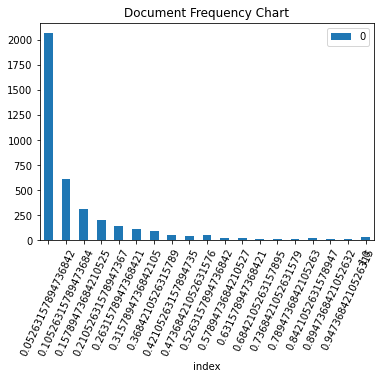

In [59]:
import matplotlib.pyplot as plot
# Draw a vertical bar chart

df_analysis.plot.bar(x="index", y=0, rot=65, title="Document Frequency Chart");

plot.show(block=True);

In [60]:
ground_truth =[]
for i in range(len(check)):
    ground_truth.append([check[i]])

NameError: name 'check' is not defined

In [ ]:
ground_truth

In [ ]:
for i in range(len(ground_truth)):
    ground_truth[i]= ground_truth[i][0].split(",")

In [ ]:
for i in range(len(ground_truth)):
    for j in range(len(ground_truth[i])):
        ground_truth[i][j] = ground_truth[i][j].strip()

In [ ]:
len(ground_truth)

In [ ]:
gt_keywords = []
for i in range(len(ground_truth)):
    gt_keywords.append([])
    for j in range(len(ground_truth[i])):
        if len(ground_truth[i][j].split(" ")) == 1:
            gt_keywords[i].append(ground_truth[i][j])

In [ ]:
len(gt_keywords[12])

In [ ]:
gt_keyphrases = []
for i in range(len(ground_truth)):
    gt_keyphrases.append([])
    for j in range(len(ground_truth[i])):
        if len(ground_truth[i][j].split(" ")) != 1:
            gt_keyphrases[i].append(ground_truth[i][j])

In [ ]:
gt_keyphrases

In [ ]:
import spacy
nlp = spacy.load('de_core_news_lg')

In [ ]:
Pos_tags=[]
for i in range(len(gt_keywords)):
    Pos_tags.append([])
    for j in range(len(gt_keywords[i])):
        sw = nlp(gt_keywords[i][j])
        for t in sw:
            tag=t.pos
            if t.text not in Pos_tags:
                Pos_tags[i].append((t.text, t.pos_))

In [ ]:
Pos_tags

In [ ]:
import spacy
nlp = spacy.load('de_core_news_lg')

In [ ]:
Extracted_Pos_tags=[]
for i in range(len(gt_keyphrases)):
    Extracted_Pos_tags.append([])
    for j in range(len(gt_keyphrases[i])):
        sw = nlp(gt_keyphrases[i][j])
        for t in sw:
            tag=t.pos
            if t.text not in Extracted_Pos_tags:
                Extracted_Pos_tags[i].append((t.text,t.pos_))

In [ ]:
Extracted_Pos_tags
# 9 pair of adjective and noun, where adjetive is followed by noun and there one pair where verb is followed by noun.

In [ ]:
from collections import Counter
word_counts = []
for i in range(len(Extracted_Pos_tags)):
    word_counts.append(Counter(Extracted_Pos_tags[i]))

In [ ]:
word_counts

In [ ]:
#using the keybert library
from keybert import KeyBERT

In [ ]:
kw_model = KeyBERT("symanto/sn-xlm-roberta-base-snli-mnli-anli-xnli")  #("clips/mfaq") #("symanto/sn-xlm-roberta-base-snli-mnli-anli-xnli") 
#clips/mfaq

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 1), stop_words=stop_words)

In [ ]:
#The default pattern is <J.*>*<N.*>+ which means that it extract keyphrases 
#that have 0 or more adjectives followed by 1 or more nouns.

# only extract a noun: pos_pattern='<N.*>'

In [ ]:
# from keyphrase_vectorizers import KeyphraseCountVectorizer
# # Init default vectorizer.
# vectorizer = KeyphraseCountVectorizer(spacy_pipeline='de_core_news_lg')

In [ ]:
# Print parameters
print(vectorizer.get_params())

In [ ]:
# After initializing the vectorizer, it can be fitted
# to learn the keyphrases from the text documents.
for i in range(len(data["Lemma_Text_Sentences"])):
    vectorizer.fit(data["Lemma_Text_Sentences"][i])

In [ ]:
# After learning the keyphrases, they can be returned.
keywords = []  # keyphrases = []
keywords.append(vectorizer.get_feature_names_out())

In [ ]:
keywords

In [ ]:
new_set_keywords = []
for i in range(len(data["Lemma_Text_Sentences"])):
    new_set_keywords.append(kw_model.extract_keywords(data["Lemma_Text_Sentences"][i], vectorizer=vectorizer,stop_words=stop_words, top_n=15, use_mmr=True, diversity=0.9))
    

In [ ]:
new_set_keywords[0]

In [ ]:
#flattening the list
flatten_list= []
for i in range(len(new_set_keywords)):
    flatten_list.append([item for sublist in new_set_keywords[i] for item in sublist])

In [ ]:
type(flatten_list[0])

In [ ]:
#to remove None Found - for keyphrase vectorizer
for i in range(len(flatten_list)):
    for elm in list(flatten_list[i]):
        if type(elm)!= tuple:
            flatten_list[i].remove(elm)

In [ ]:
flatten_list[0]

In [ ]:
# x

In [ ]:
from itertools import groupby
x.sort(key=lambda tup: tup[0])

In [ ]:
x

In [ ]:
# #to check the keyphrases
# keyphrases_set = []
# for i in range(len(flatten_list)):
#     if len(flatten_list[i][0].split(" "))> 1:
#         keyphrases_set.append(flatten_list[i])

In [ ]:
def avg(second_tuple_element):
    return sum(second_tuple_element)/len(second_tuple_element)

result = []
for i in range(len(flatten_list)):
    result.append([(n, avg([v[1] for v in flatten_list[i] if v[0] == n])) for n in set([n[0] for n in flatten_list[i]])])

In [ ]:
#sorted in descending order
updated_unique_keyword = []
for i in range(len(result)):
    updated_unique_keyword.append(sorted(result[i],key=lambda x: x[1], reverse= True))

In [ ]:
updated_unique_keyword[0]

In [ ]:
# keywords_evaluation = [updated_unique_keyword[0:300] for updated_unique_keyword in updated_unique_keyword]

In [ ]:
# keywords_evaluation[0]

In [ ]:
# new_filtered_keywords = []
# new_filtered_keyphrases = []
# for i in range(len(updated_unique_keyword)):
#     new_filtered_keywords.append([])
#     new_filtered_keyphrases.append([])
#     for elem in updated_unique_keyword[i]:
#         if len(elem[0].split()) ==1:
#             new_filtered_keywords[i].append(elem)
#         else:
#             new_filtered_keyphrases[i].append(elem)

In [ ]:
# new_filtered_keywords[0]

In [ ]:
# keywords_keyphrases = [keywords[0:300] + keyphrases[0:300] for keywords, keyphrases in zip(new_filtered_keywords, new_filtered_keyphrases)]

In [ ]:
predicted=[]
chunk_size = 1 #coz max ground truth size is 20
for i in range(len(updated_unique_keyword)):  
    predicted.append([])           #used for nested list
    for j in range(1,int(len(updated_unique_keyword[i])/chunk_size)+1):
        predicted[i].append(([elem[0] for elem in updated_unique_keyword[i]])[0:j*chunk_size])

In [ ]:
len(predicted[0])

In [ ]:
keywords_within_text[0]

In [ ]:
######################################################
# function to evaluate success of keyword extraction #
######################################################
def evaluate_keywords(proposed,keywords_within_text):
  """
  Returns precision, recall, and f1 score for proposed keywords against ground truth
  """
  proposed_set = set(proposed)
  true_set = set(keywords_within_text)
  
  true_positives = len(proposed_set.intersection(true_set))
  if len(proposed_set)==0:
    precision = 0
  else:
    # note denominator reflects total number of words
    # not total number of unique words
    precision = true_positives/float(len(proposed)) 
      
  if len(true_set)==0:
    recall = 0
  else:
    recall = true_positives/float(len(true_set))
  
  if precision + recall > 0:
    f1 = 2*precision*recall/float(precision + recall)
  else:
    f1 = 0

  return (precision, recall, f1)

In [ ]:
eval_values = []
for i in range(len(predicted)):
    eval_values.append([]) 
    for j in range(len(predicted[i])):
        eval_values[i].append(evaluate_keywords(predicted[i][j], keywords_within_text[i]))

In [ ]:
eval_values[0]

In [ ]:
precison_values = []
for i in range(len(eval_values)):
    precison_values.append([])
    for a_tuple in eval_values[i]:
        precison_values[i].append(a_tuple[0])

In [ ]:
len(precison_values[0])

In [ ]:
recall_values = []
for i in range(len(eval_values)):
    recall_values.append([])
    for a_tuple in eval_values[i]:
        recall_values[i].append(a_tuple[1])

In [ ]:
recall_values[0]

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


for i in range(len(precison_values)):
        print("Graph for document "+ str(i))
    
        # Create some mock data
        t = [x for x in range(1,(len(precison_values[i])+1))]
        data1 = precison_values[i]
        data2 = recall_values[i]

        fig, ax1 = plt.subplots()

        color = 'tab:red'
        ax1.set_xlabel('Threshold (k)')
        ax1.set_ylabel('Precision', color=color)
        ax1.plot(t, data1, color=color)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

        color = 'tab:blue'
        ax2.set_ylabel('Recall', color=color)  # we already handled the x-label with ax1
        ax2.plot(t, data2, color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        fig.tight_layout()  # otherwise the right y-label is slightly clipped
#         plt.savefig(str(i) + 'Document.png',  dpi=200)  #to save the plots
        plt.show()
      

In [ ]:
check_new = [elem[0] for elem in updated_unique_keyword[13]]
len(check_new)

In [ ]:
keywords_within_text[13]

In [ ]:
list(set(check_new).intersection(keywords_within_text[13]))

In [ ]:
check_new.index('promotion') 

In [ ]:
best_recall_indices = []
for i in range(len(recall_values)):
    best_recall_indices.append(recall_values[i].index(max(recall_values[i])))

In [ ]:
best_recall_indices

In [ ]:
best_recall_indices_element = []

for i in range(len(best_recall_indices)):
    Recall_values = recall_values[i]
    best_recall_indices_element.append(Recall_values[best_recall_indices[i]])

In [ ]:
best_recall_indices_element